## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




94781440/94765736 [==============================] - 19s 0us/step


In [4]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [5]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [8]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [10]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [12]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [13]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-13-69229fe26ea3>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
2/2 [==============================] - 22s 10s/step - loss: 7.1941 - accuracy: 0.3438 - val_loss: 6.6564 - val_accuracy: 0.1552
Epoch 2/50
2/2 [==============================] - 6s 5s/step - loss: 5.1049 - accuracy: 0.3438 - val_loss: 4.6013 - val_accuracy: 0.5172
Epoch 3/50
2/2 [==============================] - 7s 5s/step - loss: 7.6745 - accuracy: 0.4062 - val_loss: 5.2497 - val_accuracy: 0.3276
Epoch 4/50
2/2 [==============================] - 7s 5s/step - loss: 7.3207 - accuracy: 0.3906 - val_loss: 2.8353 - val_accuracy: 0.5862
Epoch 5/50
2/2 [==============================] - 7s 5s/step - loss: 4.0538 - accuracy: 0.4844 - val_loss: 1.3515 - val_accuracy: 0.4828
Epoch 6/50
2/2 [==============================] - 7s 5s/step - loss: 2.3562 - accuracy: 0.5156 - val_loss: 5.5165 - val_accuracy: 0.1552
Epoch 7/50
2/2 [==============================] - 6s 5s/step - loss: 3.0972 - accuracy: 0.4062 - val_loss: 2.4623 - val_accuracy: 0.3276
Epoch 8/50
2/2 [=======================

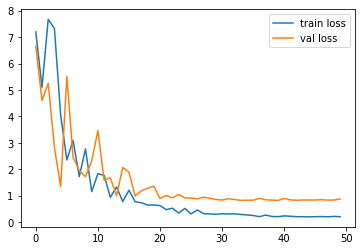

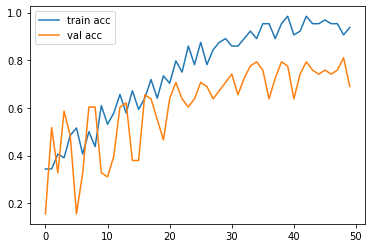

<Figure size 432x288 with 0 Axes>

In [14]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [15]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

D:\Anaconda\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [16]:

y_pred = model.predict(test_set)


In [17]:
y_pred

array([[3.05882972e-02, 7.58696735e-01, 2.10714877e-01],
       [8.27184200e-01, 9.07847285e-02, 8.20310712e-02],
       [3.81079386e-03, 3.06643154e-02, 9.65524912e-01],
       [2.01323070e-02, 5.45163512e-01, 4.34704214e-01],
       [3.91059462e-03, 9.49301720e-01, 4.67877910e-02],
       [2.10359171e-02, 8.75838995e-01, 1.03125066e-01],
       [6.45164261e-03, 4.80306923e-01, 5.13241351e-01],
       [1.69582114e-01, 7.52315223e-01, 7.81026483e-02],
       [6.18834972e-01, 2.33849034e-01, 1.47316039e-01],
       [1.93563104e-02, 5.20516872e-01, 4.60126847e-01],
       [6.41520992e-02, 1.08614834e-02, 9.24986482e-01],
       [1.27831586e-02, 9.40173090e-01, 4.70437445e-02],
       [2.75235713e-01, 4.86415625e-02, 6.76122725e-01],
       [2.42293812e-02, 4.27901655e-01, 5.47868967e-01],
       [8.47804472e-02, 2.87222147e-01, 6.27997458e-01],
       [1.07161226e-02, 1.54855335e-03, 9.87735331e-01],
       [2.55586430e-02, 7.59721035e-03, 9.66844201e-01],
       [6.81819022e-03, 9.45870

In [18]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [19]:
y_pred

array([1, 0, 2, 1, 1, 1, 2, 1, 0, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2,
       1, 0, 1, 2, 1, 2, 2, 0, 2, 2, 0, 2, 1, 1, 2, 1, 2, 2, 1, 0, 1, 2,
       2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1], dtype=int64)

In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [21]:
model=load_model('model_resnet50.h5')

In [22]:
img_data

NameError: name 'img_data' is not defined

In [23]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))



In [24]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [25]:
x.shape

(224, 224, 3)

In [26]:
x=x/255

In [27]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [28]:
model.predict(img_data)

array([[5.4067554e-04, 1.4070590e-03, 9.9805224e-01]], dtype=float32)

In [29]:
a=np.argmax(model.predict(img_data), axis=1)

In [30]:
a==1

array([False])